### Import da data

In [1]:
import soundata

dataset = soundata.initialize('urbansound8k')
dataset.download()  # download the dataset
dataset.validate()  # validate that all the expected files are there

example_clip = dataset.choice_clip()  # choose a random example clip
print(example_clip)  # see the available data


C:\Users\beatr\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


ImportError: Numba needs NumPy 1.21 or less

### Informação do dataset

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("C:/tmp/sound_datasets/urbansound8k/metadata/UrbanSound8K.csv")

In [3]:
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [11]:
import os
import librosa
import librosa.display
import glob 
import skimage

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fsID,8732.0,116033.493816,57991.017218,344.000000,69942.250000,118279.000000,166942.000000,209992.000000
start,8732.0,38.645409,74.292126,0.000000,3.000000,10.376492,35.131372,600.125356
end,8732.0,42.253312,74.369669,0.105962,6.839398,14.000000,38.866979,604.125356
salience,8732.0,1.347000,0.476043,1.000000,1.000000,1.000000,2.000000,2.000000
fold,8732.0,5.385937,2.846820,1.000000,3.000000,5.000000,8.000000,10.000000
classID,8732.0,4.592877,2.894544,0.000000,2.000000,4.000000,7.000000,9.000000


In [19]:
df.isnull().sum() #nao existem valores null no df

slice_file_name    0
fsID               0
start              0
end                0
salience           0
fold               0
classID            0
class              0
dtype: int64

In [20]:
#classes nao balanceadas
df['class'].value_counts()


dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

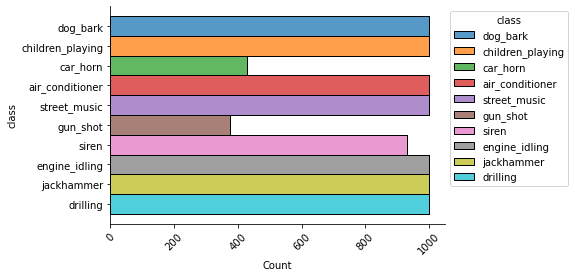

In [23]:
#ver graficamente
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
ax = sns.histplot(y='class',data = df, hue="class", multiple="stack")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=45);
sns.despine()
plt.show()

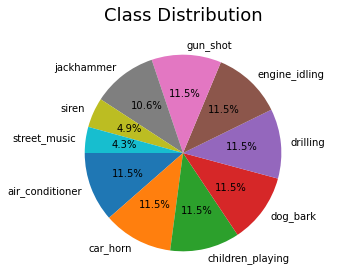

In [24]:
class_dict = df['class'].value_counts(normalize=True)
classes = list(np.unique(df['class']))
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08, fontsize=18)
ax.pie(class_dict, labels=classes, autopct='%1.1f%%', shadow=False, startangle=180)
ax.axis('equal')
plt.savefig("distribution_class")
plt.show(block=False)

#### analizar amostras random dos sons

In [16]:
#acho que o start e o end nao sao importantes. sao extracao de audios de 4 segundos, onde comeca e onde acaba nao importa
#nem todos os audios sao de 4 seg, havera problemas com isso?

In [25]:

#sr = sampling rate -> numero de amostras do som por segundo
audiodata, sr=librosa.load('C:/tmp/sound_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav')
audiodata


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0969747e-05,
       2.2333768e-05, 0.0000000e+00], dtype=float32)

In [26]:
sr

22050

In [27]:
import IPython.display as ipd
ipd.Audio('C:/tmp/sound_datasets/urbansound8k/audio/fold1/7061-6-0-0.wav')


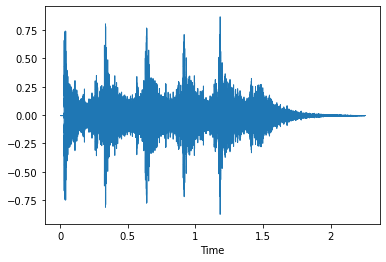

In [28]:
librosa.display.waveshow(audiodata, sr=sr)

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

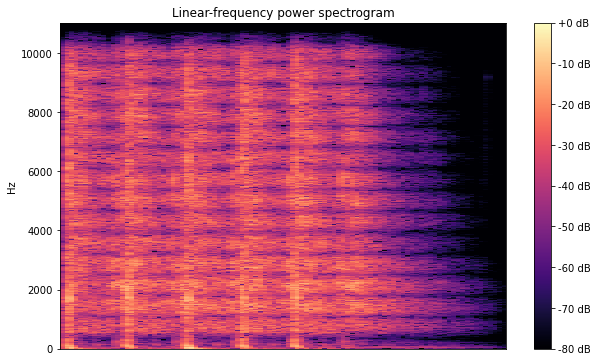

In [29]:
D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata)), ref=np.max)
plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

In [33]:
audio_file_path ='C:/tmp/sound_datasets/urbansound8k/audio/fold2/4201-3-0-0.wav'

audiodata2,sr2=librosa.load(audio_file_path)

ipd.Audio(audio_file_path)



Text(0.5, 1.0, 'Linear-frequency power spectrogram')

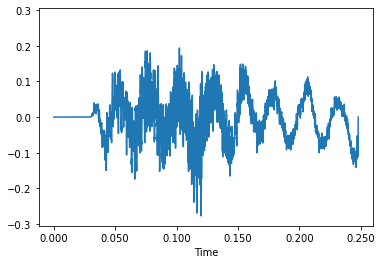

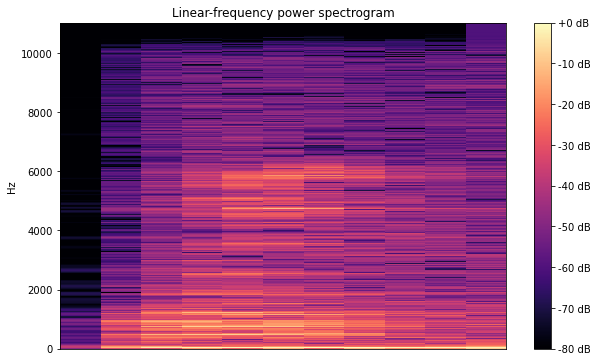

In [34]:
librosa.display.waveshow(audiodata2, sr=sr2)

D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata2)), ref=np.max)

plt.figure(figsize=(10, 6))
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

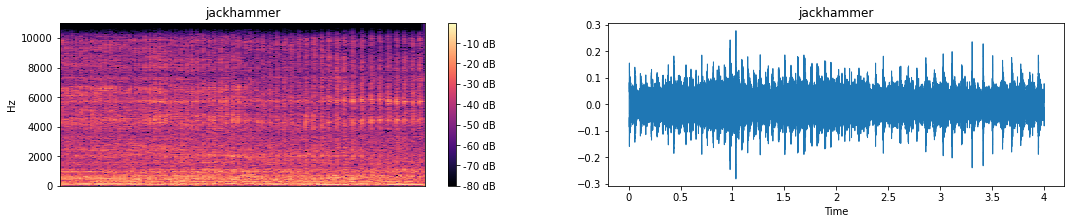

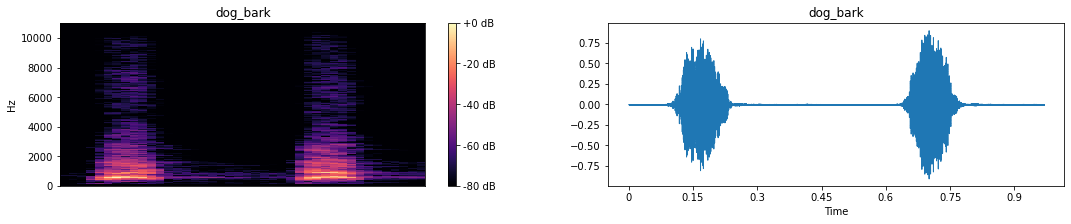

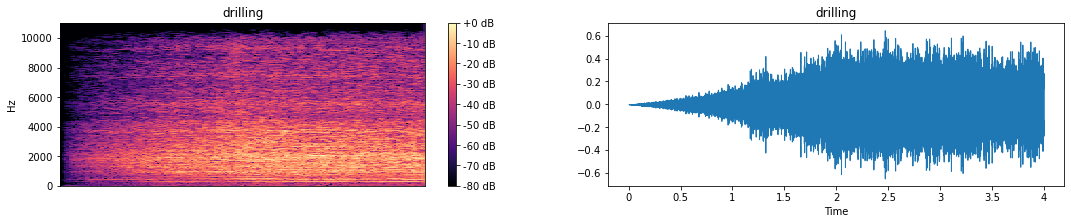

In [38]:
for i in range(192, 197, 2):
    audio_file_path = 'C:/tmp/sound_datasets/urbansound8k/audio/fold' + str(df["fold"][i]) + '/' + df["slice_file_name"][i]
    
    audiodata3, sr3 = librosa.load(audio_file_path)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(audiodata3)), ref=np.max)
    
    plt.figure(figsize=(18, 3))
    
    plt.subplot(1, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(df["class"][i])
    
    plt.subplot(1, 2, 2)
    librosa.display.waveshow(audiodata3, sr=sr3)
    plt.title(df["class"][i])

In [ ]:
features=[]
label=[]

def